In [1]:
import os
import pandas as pd
import seaborn as sns

from itertools import cycle
import matplotlib.lines as mlines
from matplotlib import pyplot as plt

In [2]:
markers = ["*", "o", "h", "v", "P", "s", "p", "x", "D", "8"]
marker_cycle = cycle(markers)

colors = [sns.cubehelix_palette(5, start=i, rot=0)[2:4] for i in range(5)]
colors = [("red", "red"), ("green", "green"), ("blue", "blue")]
color_cycle = cycle(colors)

In [3]:
plots_dir = "plots"

In [4]:
fontsize = 20

In [5]:
COLORING_PROGRAM = "coloring"
DIJKSTRA_PROGRAM = "dijkstra_token_ring"
MAX_MATCHING_PROGRAM = "maximal_matching"

In [6]:
program = DIJKSTRA_PROGRAM

In [7]:
model = "lstm_trained_at_2025_05_12_21_31"

In [8]:
graph_name = "star_graph_n7"
graph_name = "graph_powerlaw_cluster_graph_n7"
graph_name = "graph_random_regular_graph_n7_d4"
graph_name = "star_graph_n13"
graph_name = "graph_powerlaw_cluster_graph_n8"
graph_name = "graph_powerlaw_cluster_graph_n9"
graph_name = "graph_random_regular_graph_n8_d4"
# graph_name = "graph_random_regular_graph_n9_d4"
graph_name = "implicit_graph_n8"

In [9]:
result_type = "cvf_by_node"

In [10]:
filepath = os.path.join("ml_predictions", f"{model}__{graph_name}__{result_type}.csv")
df = pd.read_csv(filepath, index_col=0)
df

,node,rank effect,fa_count,ml_count
0,0,-54.0,0.0,0.0
1,0,-53.0,0.0,0.0
2,0,-52.0,0.0,0.0
3,0,-51.0,0.0,1.0
4,0,-50.0,0.0,1.0
...,...,...,...,...
891,7,50.0,0.0,0.0
892,7,51.0,0.0,0.0
893,7,52.0,0.0,0.0
894,7,53.0,0.0,0.0


In [11]:
if 'fa_count' in df.columns:
    df = df[['rank effect', 'node', 'ml_count', 'fa_count']]
    df = df.rename(columns={'ml_count': 'ML count', 'fa_count': 'FA count'})
else:
    df = df[['rank effect', 'ml_count']]
    df = df.rename(columns={'ml_count': 'ML count'})
df

,rank effect,node,ML count,FA count
0,-54.0,0,0.0,0.0
1,-53.0,0,0.0,0.0
2,-52.0,0,0.0,0.0
3,-51.0,0,1.0,0.0
4,-50.0,0,1.0,0.0
...,...,...,...,...
891,50.0,7,0.0,0.0
892,51.0,7,0.0,0.0
893,52.0,7,0.0,0.0
894,53.0,7,0.0,0.0


In [12]:
# df = df.set_index(['rank effect'], drop=True)
# df

In [13]:
rank_effects = df["rank effect"].unique()
rank_effects.sort()
df_preproc = pd.DataFrame({"Rank Effect": rank_effects})

In [14]:
nodes = df["node"].unique()
nodes.sort()
for node in nodes:
    col = f"Node {node} FA count"
    node_data = df.loc[(df["node"] == node)]["FA count"]
    node_data = node_data.reset_index(drop=True)
    df_preproc.loc[:, col] = node_data
    col = f"Node {node} ML count"
    node_data = df.loc[(df["node"] == node)]["ML count"]
    node_data = node_data.reset_index(drop=True)
    df_preproc.loc[:, col] = node_data

In [15]:
df_preproc

,Rank Effect,Node 0 FA count,Node 0 ML count,Node 1 FA count,Node 1 ML count,Node 2 FA count,Node 2 ML count,Node 3 FA count,Node 3 ML count,Node 4 FA count,Node 4 ML count,Node 5 FA count,Node 5 ML count,Node 6 FA count,Node 6 ML count,Node 7 FA count,Node 7 ML count
0,-59.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-58.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-57.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-56.0,0.0,1.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-55.0,0.0,1.0,6.0,6.0,0.0,5.0,9.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,55.0,NaN,NaN,0.0,4.0,0.0,5.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,56.0,NaN,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,57.0,NaN,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,58.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
selected_nodes = [0, 2, 4]

selected_cols = ["Rank Effect"]
for i in selected_nodes:
    selected_cols.extend([f"Node {i} FA count", f"Node {i} ML count"])

df_preproc = df_preproc[selected_cols]
df_preproc.set_index("Rank Effect", inplace=True)

df_preproc

,Node 0 FA count,Node 0 ML count,Node 2 FA count,Node 2 ML count,Node 4 FA count,Node 4 ML count
Rank Effect,,,,,,
-59.0,0.0,0.0,0.0,1.0,0.0,1.0
-58.0,0.0,0.0,0.0,1.0,0.0,0.0
-57.0,0.0,0.0,0.0,1.0,0.0,0.0
-56.0,0.0,1.0,0.0,1.0,0.0,0.0
-55.0,0.0,1.0,0.0,5.0,0.0,1.0
...,...,...,...,...,...,...
55.0,NaN,NaN,0.0,5.0,NaN,NaN
56.0,NaN,NaN,0.0,1.0,NaN,NaN
57.0,NaN,NaN,0.0,1.0,NaN,NaN


In [17]:
def get_title():
    result = " ".join(graph_name.split("_")).title()
    return result

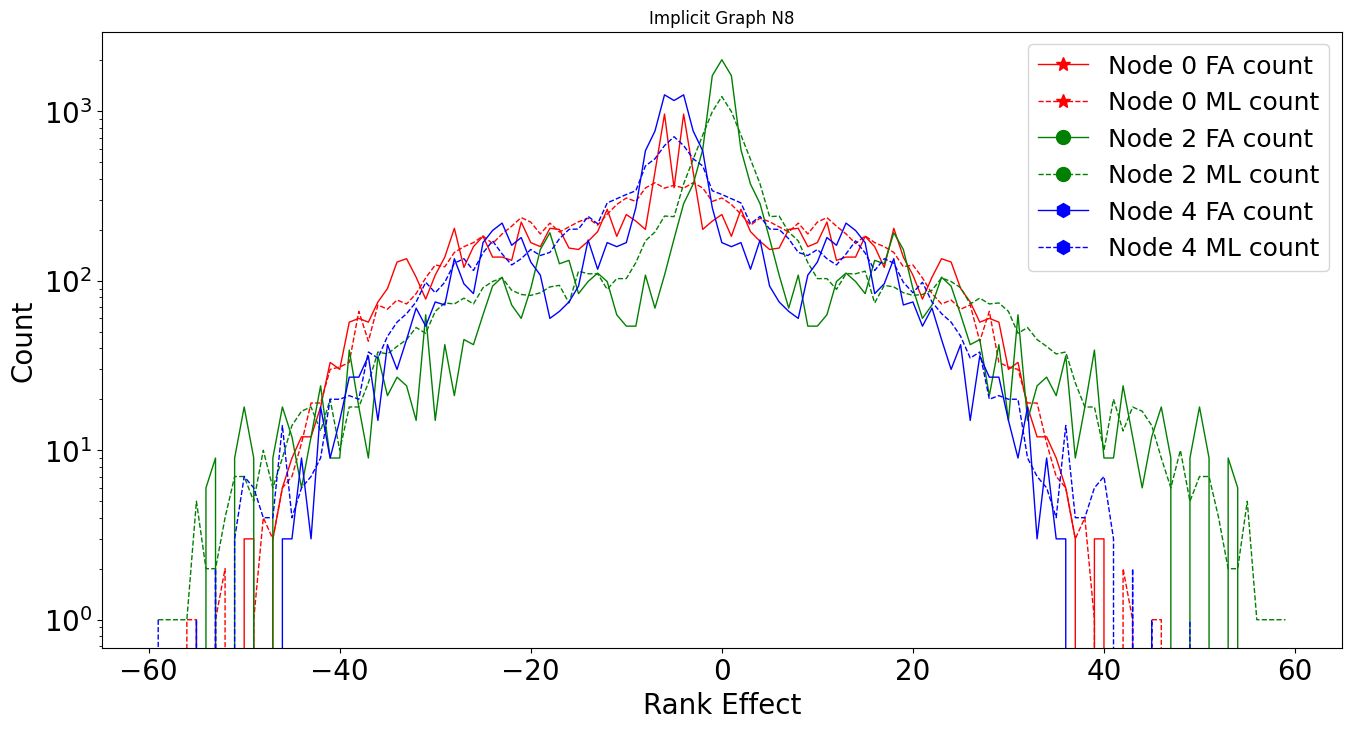

In [18]:
plt.figure(figsize=(16, 8))
ax = sns.lineplot(data=df_preproc, linewidth=1, markersize=10)
prev_marker = None
next_color = None
for i, line in enumerate(ax.lines):
    if prev_marker is None:
        marker = next(marker_cycle)
        color, next_color = next(color_cycle)
        prev_marker = marker
        line_style = 'solid'
    else:
        marker = prev_marker
        color = next_color
        prev_marker = None
        line_style = 'dashed'
    # line.set_marker(marker)
    line.set_color(color)
    line.set_linestyle(line_style)


ax.set_xlabel("Rank Effect")

ax.set_yscale("log")
ax.set_ylabel("Count")
ax.tick_params(axis="x", labelsize=fontsize)
ax.tick_params(axis="y", labelsize=fontsize)
ax.xaxis.label.set_size(fontsize)
ax.yaxis.label.set_size(fontsize)

ax.set_title(get_title())


file_name = f"RE_Node__{program}__{graph_name}__{model}.png"


dup_markers = []
for marker in markers:
    dup_markers.extend([marker, marker])

custom_lines = [
    mlines.Line2D([], [], color=line.get_color(), marker=marker, label=cat, linewidth=1, markersize=10, linestyle=line.get_linestyle())
    for line, marker, cat in zip(ax.lines, dup_markers, selected_cols[1:])
]

plt.rc("font", size=fontsize)
plt.legend(handles=custom_lines,fontsize=fontsize * 0.9)  # using a size in points